<h1 style="color: red;">Visualización de Datos en NLP</h1>

In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

stopwords = stopwords.words("english")

In [2]:
stopwords.extend(["https", "co", "u"])

In [3]:
cd ..

/home/eacardenase/Documents/Especializacion en Analitica Estrategica de Datos/2nd semester/Natural Language Processing


In [4]:
cd covid_tweets/

/home/eacardenase/Documents/Especializacion en Analitica Estrategica de Datos/2nd semester/Natural Language Processing/covid_tweets


In [5]:
corona_tweets = pd.read_csv("Corona_NLP_test.csv")

In [6]:
corona_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

In [8]:
corona_tweets['pp'] = corona_tweets["OriginalTweet"].apply(lambda texto: pre_procesado(texto))
corona_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,pp
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending new yorkers encounter empty supermark...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,find hand sanitizer fred meyer turned amazon p...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,find protect loved ones coronavirus
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city anxious shopper...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...


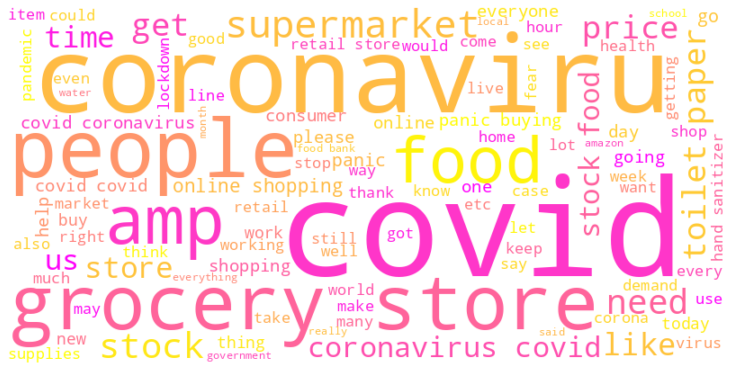

In [9]:
palabras = corona_tweets["pp"].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [10]:
img = PIL.Image.open("download.jpeg")

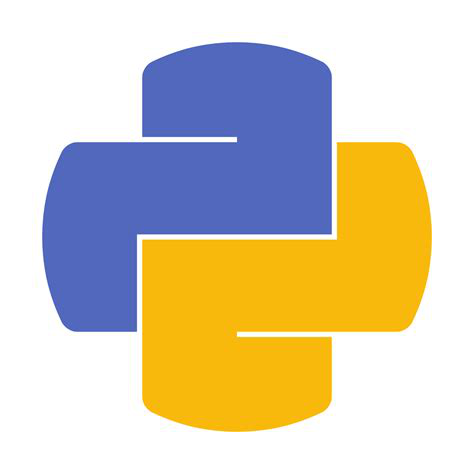

In [11]:
mask = np.array(img)
display(img)

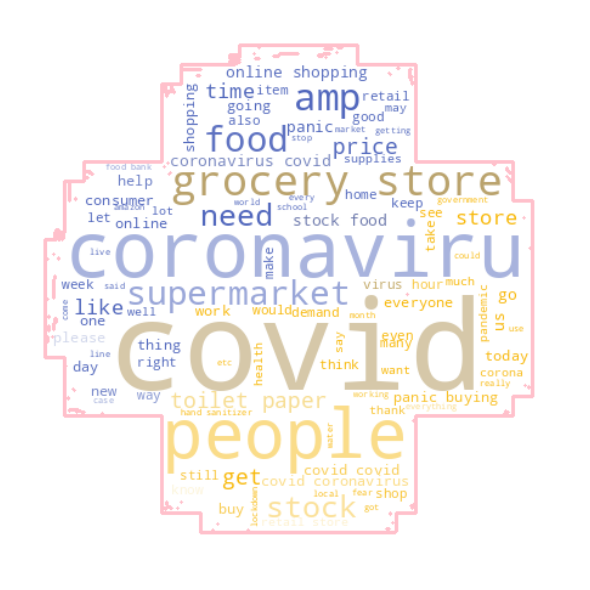

In [12]:
# Despues de muchos intentos, este logo fue el que me dio un mejor resultado
# para la mask de la nube de palabras

palabras = corona_tweets["pp"].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True, mask=mask, contour_width=3,
                     contour_color="pink").generate(palabras) 

image_colors = ImageColorGenerator(mask)
wordcloud.to_file("corona_tweets.png")
    
plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()